In [52]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def cut_data(x, y, cut_x=2.5):
    # Find the indices where x crosses the cut value
    cut_indices = np.where(x < cut_x)[0]
    #print(cut_indices)
    
    # Check if any cut indices were found
    if len(cut_indices) > 0:
        # Get the last index where x crosses the cut value
        cut_index = cut_indices[-1] + 1
    else:
        # No cut indices were found, set cut_index to the length of x
        cut_index = len(x)
    
    # Keep only the data before the cut_index
    x = x[:cut_index]
    y = y[:cut_index]

    #print(x)
    #print(y)
    return x,y

def cut_data1(x, y, cut_x=0.8):
    # Find the indices where x crosses the cut value
    cut_indices = np.where(x > cut_x)[0]
    
    # Check if any cut indices were found
    if len(cut_indices) > 0:
        # Get the first index where x crosses the cut value
        cut_index = cut_indices[0]
    else:
        # No cut indices were found, set cut_index to the length of x
        cut_index = len(x)
    
    # Keep only the data after the cut_index
    x = x[cut_index:]
    y = y[cut_index:]

    return x, y

def analyse_data_ava(curve_data, curve_index, cut_x=2.75):
    ##read data
    file_number, x, y = curve_data[curve_index]
    #print(curve_data[curve_index])

    ## cut data
    x, y = cut_data(x, y, cut_x)
    x, y = cut_data1(x,y,1.08)

    ## linear regression
    # Reshape the data if needed
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    #print(x, y)
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(x, y)

    # Get the coefficients (slope and intercept)
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    # Calculate predicted y values
    y_pred = model.predict(x)

    # Calculate regression metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Return the regression results
    return slope, intercept, mse, r2, x, y, y_pred

plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=15)
plt.rc('lines', markersize=6)
plt.rc('lines', linewidth=3)
plt.rc('legend', loc='best')
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', family='serif')


In [25]:
plt.rc('font', family='serif')
plt.figure(dpi=300)

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

['lep_ava_1024.dat', 'lep_ava_8192.dat', 'lep_ava_16.dat', 'lep_ava_16384.dat', 'lep_ava_4096.dat', 'lep_ava_2.dat', 'lep_ava_8.dat', 'lep_ava_128.dat', 'lep_ava_512.dat', 'lep_ava_64.dat']


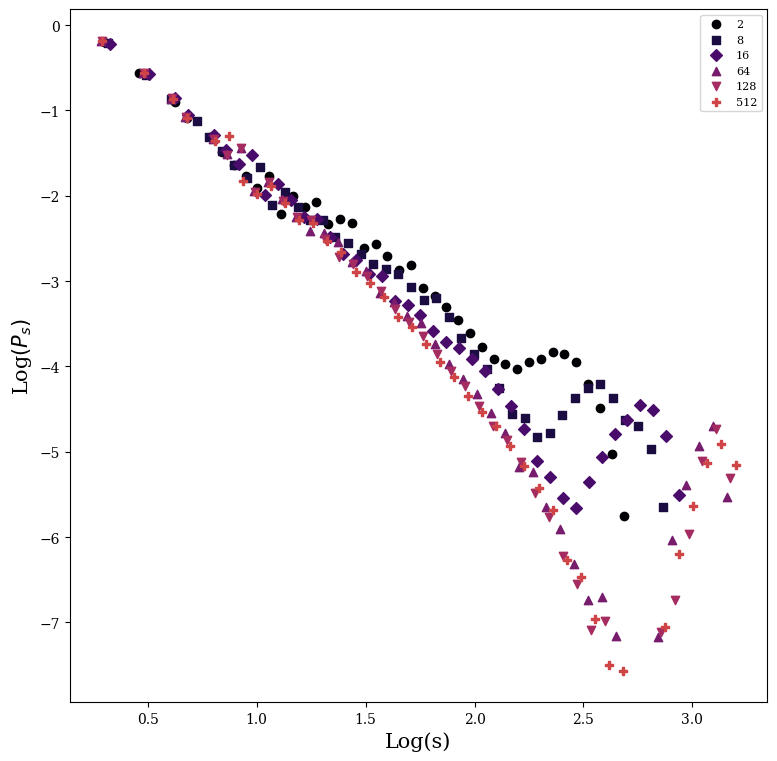

<Figure size 900x900 with 0 Axes>

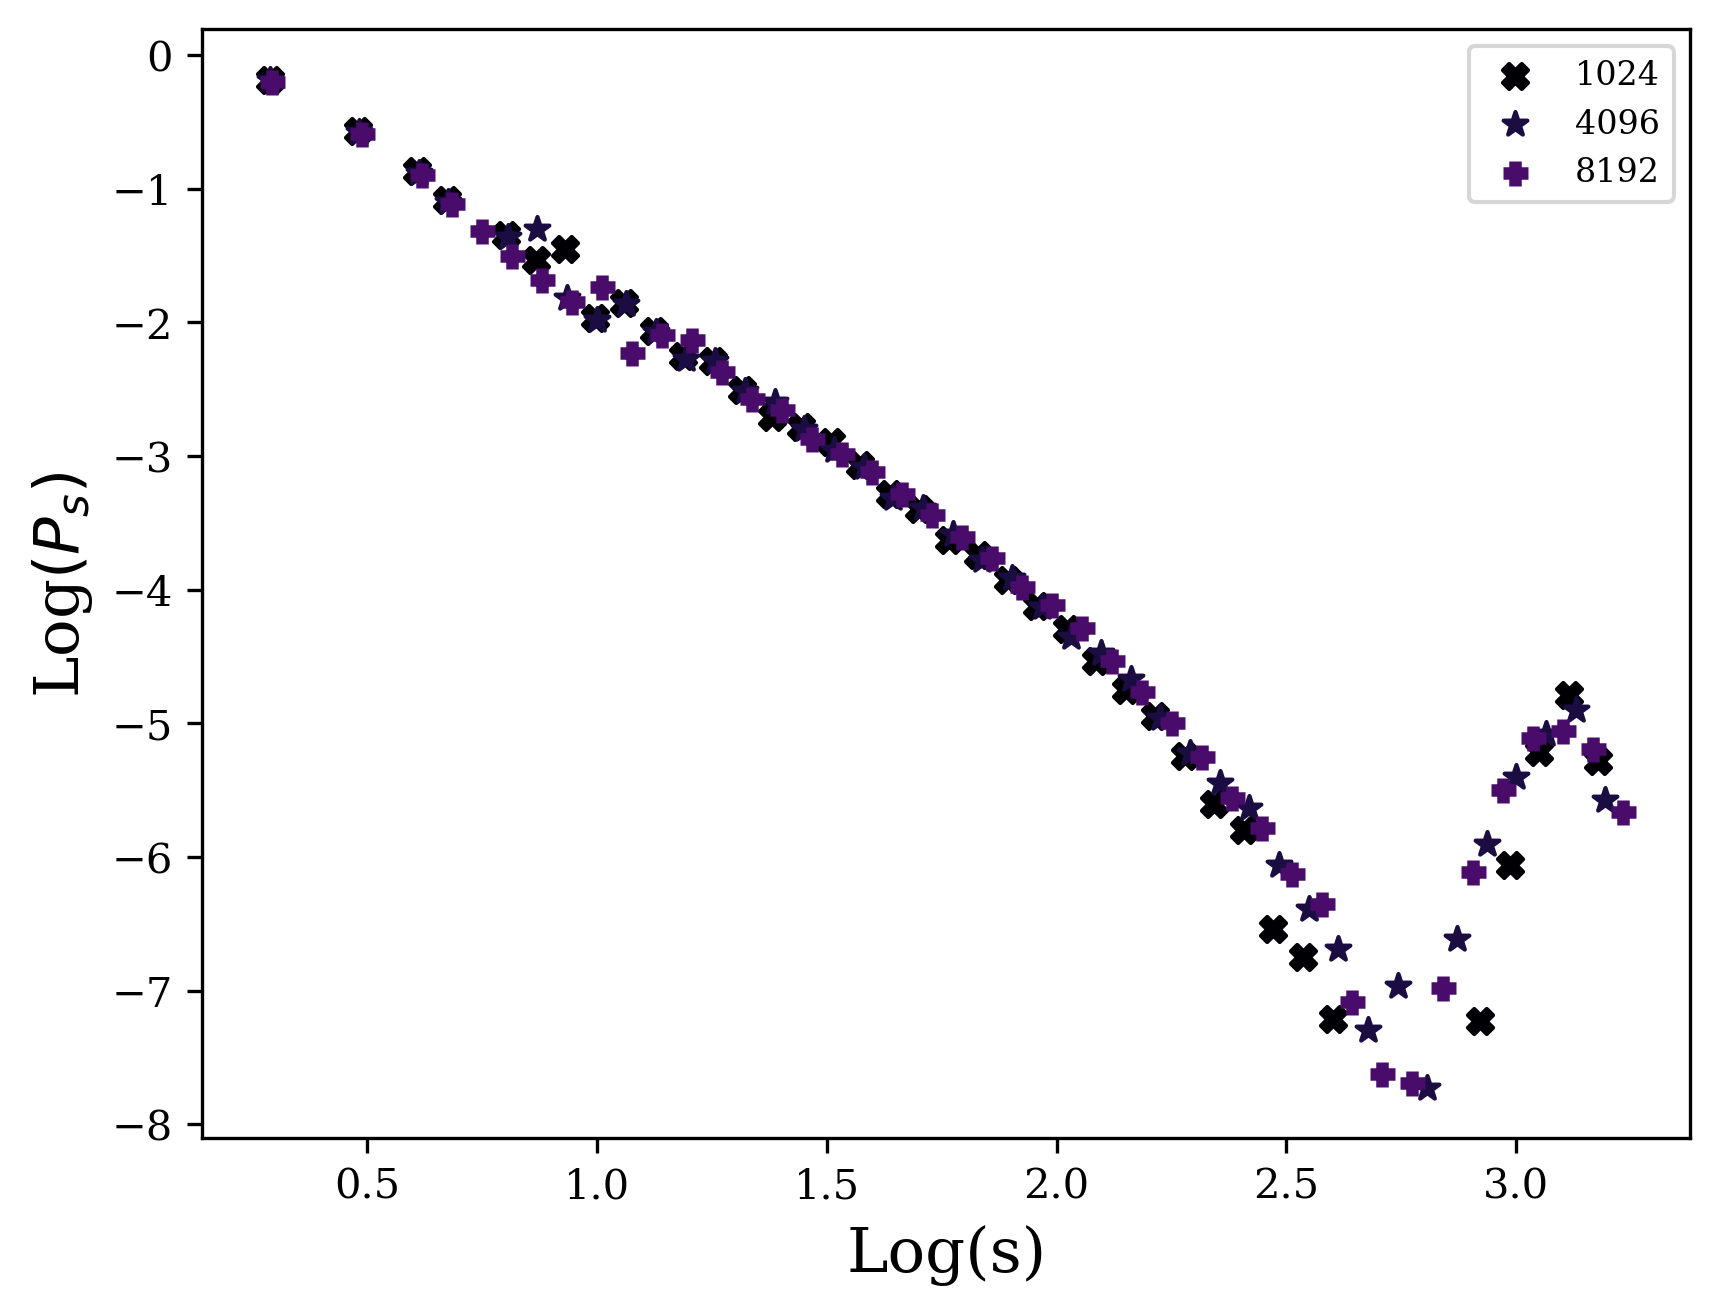

In [66]:
# Specify the folder path containing the .dat files
folder_path = '/home/robert/data_zurik/avalanche'

# Define the list of specific numbers
ts = [1024, 8192, 16, 16384, 4096, 2, 8, 128, 512, 64]
specific_numbers = sorted(ts)  # Sort the list in ascending order

# Get a list of all .dat files in the folder
dat_files = [file for file in os.listdir(folder_path) if file.endswith(".dat")]
print(dat_files)

# Create a dictionary to map specific numbers to file names
number_file_map = {}

# Iterate over each .dat file
for file_name in dat_files:
    # Extract the number from the file name using regular expressions
    number_match = re.search(r"\d+", file_name)
    if number_match:
        file_number = int(number_match.group())
    else:
        continue

    # Check if the file number is in the specific numbers list
    if file_number in specific_numbers:
        number_file_map[file_number] = file_name

# Set up the plot
plt.figure(figsize=(9, 9))

curve_index = np.linspace(0,9,10)
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']
colors = plt.cm.inferno(np.linspace(0, 1, len(curve_index)))  # Esquema de cores Viridis
curve_data = []
i = 0
# Iterate over specific numbers in ascending order
for file_number in specific_numbers[:6]:
    
    if file_number in number_file_map:
        file_name = number_file_map[file_number]
        file_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(file_path)

        # Separate the columns
        x = data[:, 0]
        y = data[:, 1]

        # Save the data for the curve in a tuple and append to the list
        curve_data.append((file_number, x, y))

        # Plot the curve
        label = '%d' % file_number
        plt.scatter(x, y, label=label, marker=markers[i], color = colors[i])
        i+=1

# Adding labels and title
plt.xlabel('Log(s)')
plt.ylabel(r'Log$(P_{s})$')

# Criar uma legenda no canto inferior esquerdo
plt.legend()
plt.show()

plt.figure(figsize=(9,9))
plt.figure(dpi=300)
# Iterate over specific numbers in ascending order
for file_number in specific_numbers[6:-1]:
    
    if file_number in number_file_map:
        file_name = number_file_map[file_number]
        file_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(file_path)

        # Separate the columns
        x = data[:, 0]
        y = data[:, 1]

        # Save the data for the curve in a tuple and append to the list
        curve_data.append((file_number, x, y))

        # Plot the curve
        label = '%d' % file_number
        plt.scatter(x, y, label=label, marker=markers[i], color = colors[i-6])
        i+=1

# Adding labels and title
plt.xlabel('Log(s)')
plt.ylabel(r'Log$(P_{s})$')

# Criar uma legenda no canto inferior esquerdo
plt.legend()
plt.show()

# complete curve_data
curve_data = []
i = 0
# Iterate over specific numbers in ascending order
for file_number in specific_numbers[:]:
    
    if file_number in number_file_map:
        file_name = number_file_map[file_number]
        file_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(file_path)

        # Separate the columns
        x = data[:, 0]
        y = data[:, 1]

        # Save the data for the curve in a tuple and append to the list
        curve_data.append((file_number, x, y))


Curve 2 - Angular Coefficient (Slope): -1.9382107940468134, Intercept: 0.2957407073148768
Mean Squared Error (MSE): 0.015210266682823046, R-squared (R2) Score: 0.9669136094887195
------------------------------------
Curve 8 - Angular Coefficient (Slope): -2.3676558513056984, Intercept: 0.8232484182205018
Mean Squared Error (MSE): 0.020492301673663147, R-squared (R2) Score: 0.9711281375147738
------------------------------------
Curve 16 - Angular Coefficient (Slope): -2.646221744594297, Intercept: 1.1202974698602373
Mean Squared Error (MSE): 0.023398264136942872, R-squared (R2) Score: 0.9806057345173537
------------------------------------
Curve 64 - Angular Coefficient (Slope): -2.851323501693187, Intercept: 1.3043354541351913
Mean Squared Error (MSE): 0.01826738380616798, R-squared (R2) Score: 0.9836897175722865
------------------------------------
Curve 128 - Angular Coefficient (Slope): -3.0556473517851916, Intercept: 1.5841603482241773
Mean Squared Error (MSE): 0.02588778917738709

<Figure size 900x900 with 0 Axes>

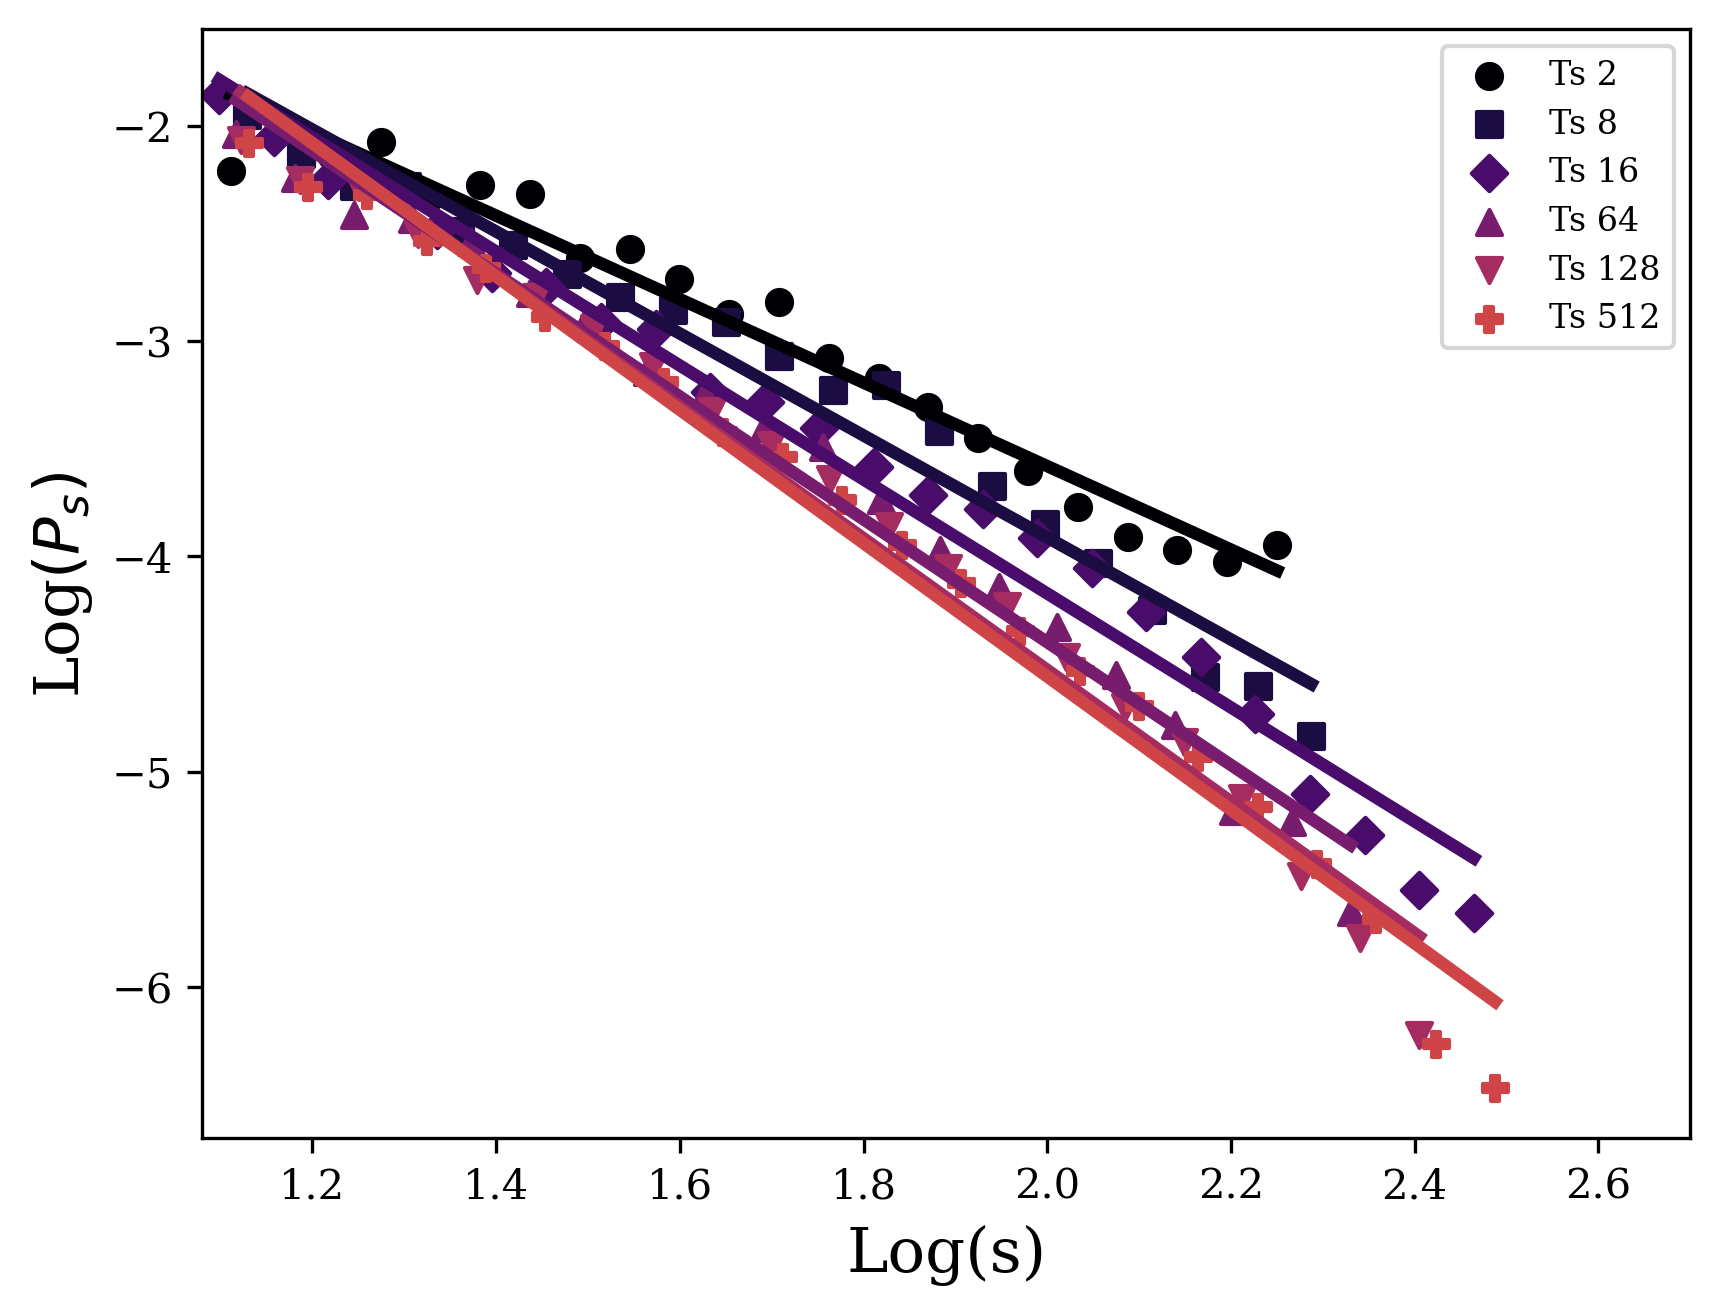

<Figure size 900x900 with 0 Axes>

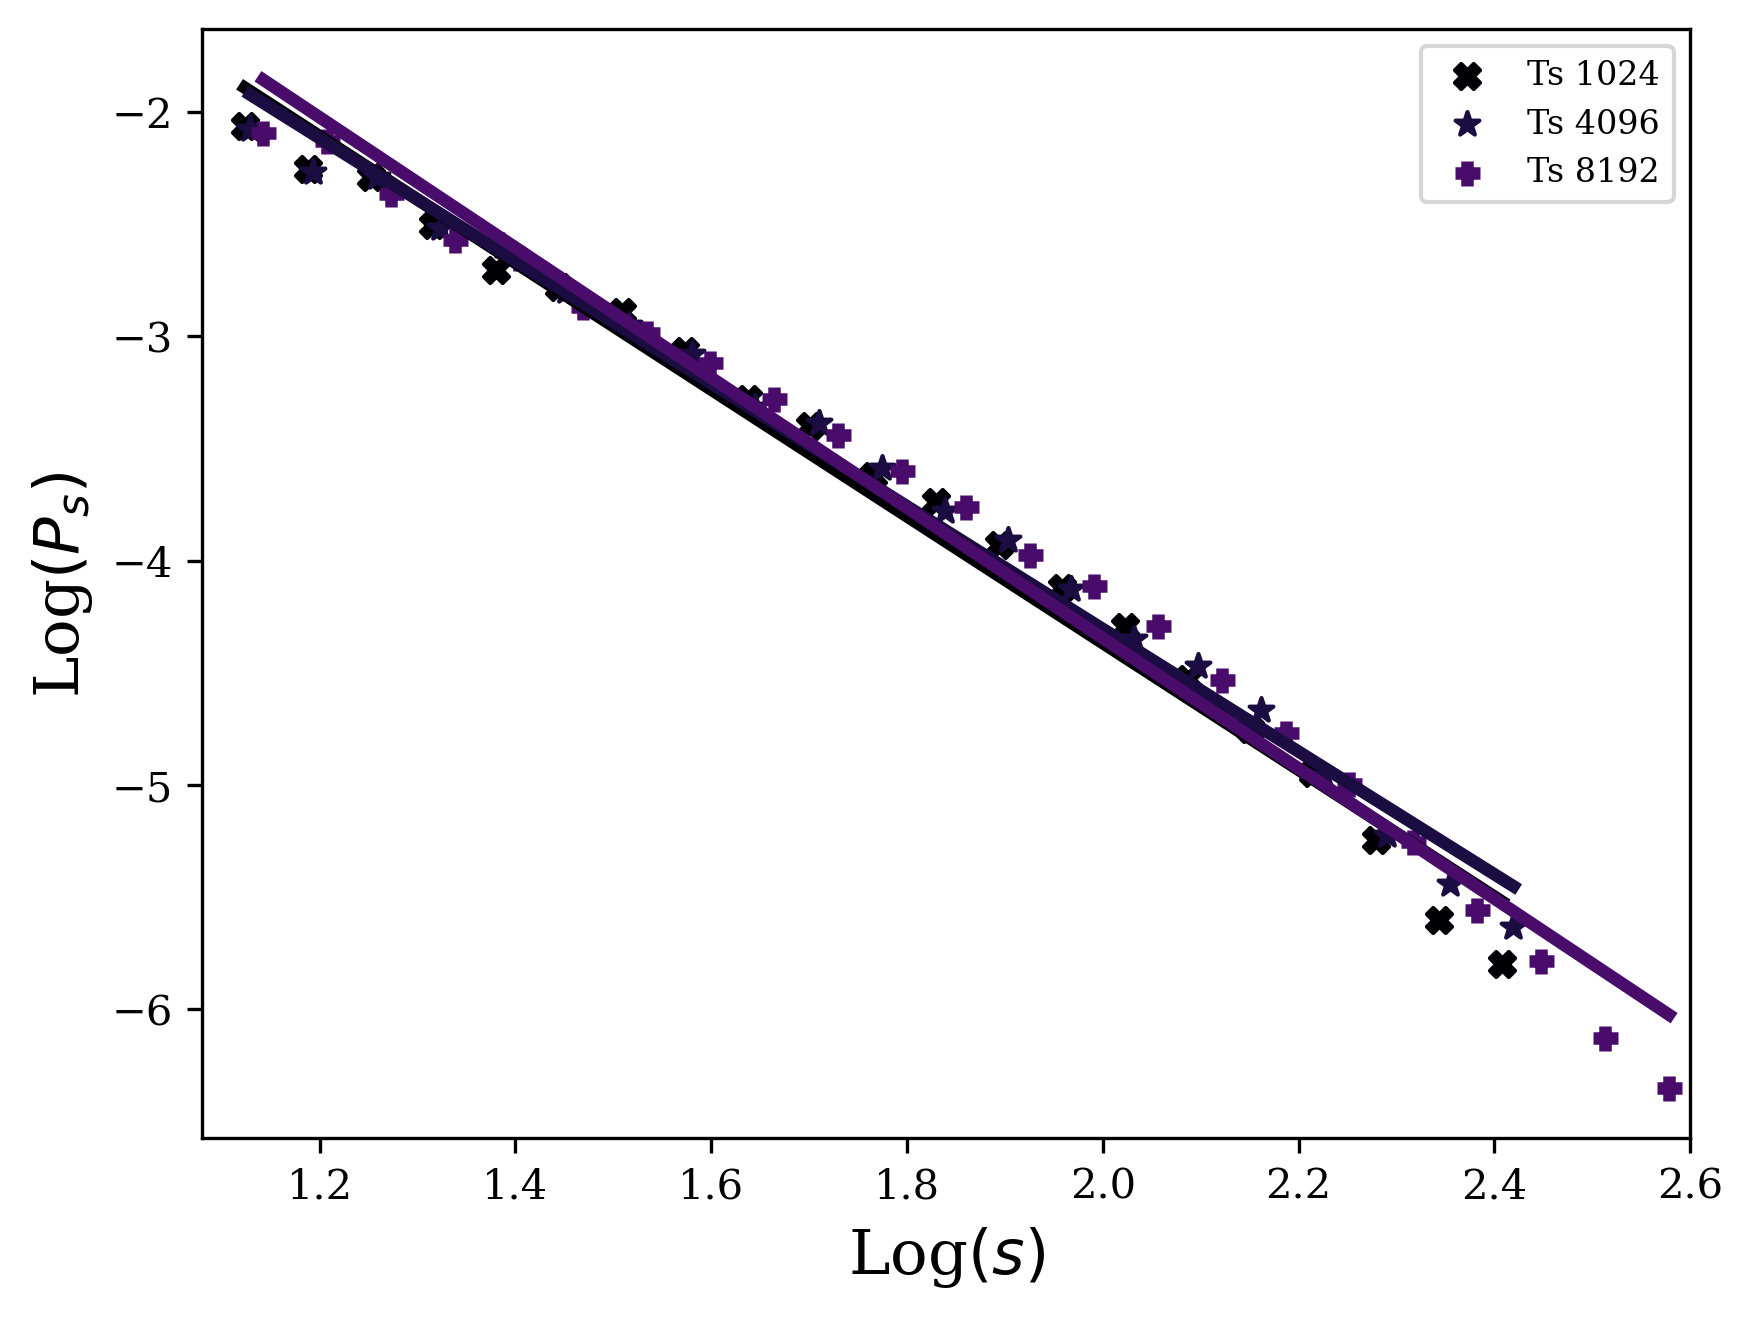

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Example data (replace this with your actual data)
curve_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cut = [2.30, 2.34, 2.5, 2.39, 2.46, 2.55, 2.47, 2.48, 2.64, 2.43]


colors = plt.cm.inferno(np.linspace(0, 1, len(curve_index)))  # Esquema de cores Viridis
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']
# Define custom dark colors for each curve
dark_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# Set custom font for legends and tick labels
#mpl.rcParams['font.family'] = 'sans-serif'  # Use a font family that you prefer
#mpl.rcParams['font.sans-serif'] = ['Arial']  # Specify the font name

plt.figure(figsize = (9,9))
plt.figure(dpi=300)
exp_crit = []
for i in curve_index[:6]:
    slope, intercept, mse, r2, x, y, y_pred = analyse_data_ava(curve_data, i, cut[i])
    file_name = curve_data[i][0]
    exp_crit.append(slope)
    # Print the regression results for each curve
    print(f"Curve {file_name} - Angular Coefficient (Slope): {slope}, Intercept: {intercept}")
    print(f"Mean Squared Error (MSE): {mse}, R-squared (R2) Score: {r2}")
    print("------------------------------------")
    # Plot the data points for each curve with the custom dark color
    plt.scatter(x, y, label=f'Ts {file_name}', marker=markers[i], color=colors[i])

    # Plot the fitted regression line for each curve with the custom dark color
    plt.plot(x, y_pred, color=colors[i])

# Adding labels and title
plt.xlabel('Log(s)')
plt.ylabel(r'Log$(P_{s})$')
plt.xlim(1.08,2.7)
plt.legend()




plt.figure(figsize=(9, 9))
plt.figure(dpi=300)
for i in curve_index[6:-1]:
    print(i)
    slope, intercept, mse, r2, x, y, y_pred = analyse_data_ava(curve_data, i, cut[i])
    file_name = curve_data[i][0]
    # Print the regression results for each curve
    exp_crit.append(slope)
    print(f"Curve {file_name} - Angular Coefficient (Slope): {slope}, Intercept: {intercept}")
    print(f"Mean Squared Error (MSE): {mse}, R-squared (R2) Score: {r2}")
    print("------------------------------------")
    # Plot the data points for each curve with the custom dark color
    plt.scatter(x, y, label=f'Ts {file_name}', marker=markers[i], color=colors[i-6])

    # Plot the fitted regression line for each curve with the custom dark color
    plt.plot(x, y_pred, color=colors[i-6])


# Adding labels and title
plt.xlabel(r'Log$(s)$')
plt.ylabel(r'Log$(P_{s})$')
plt.xlim(1.08,2.6)
plt.legend()

plt.show()


<Figure size 900x900 with 0 Axes>

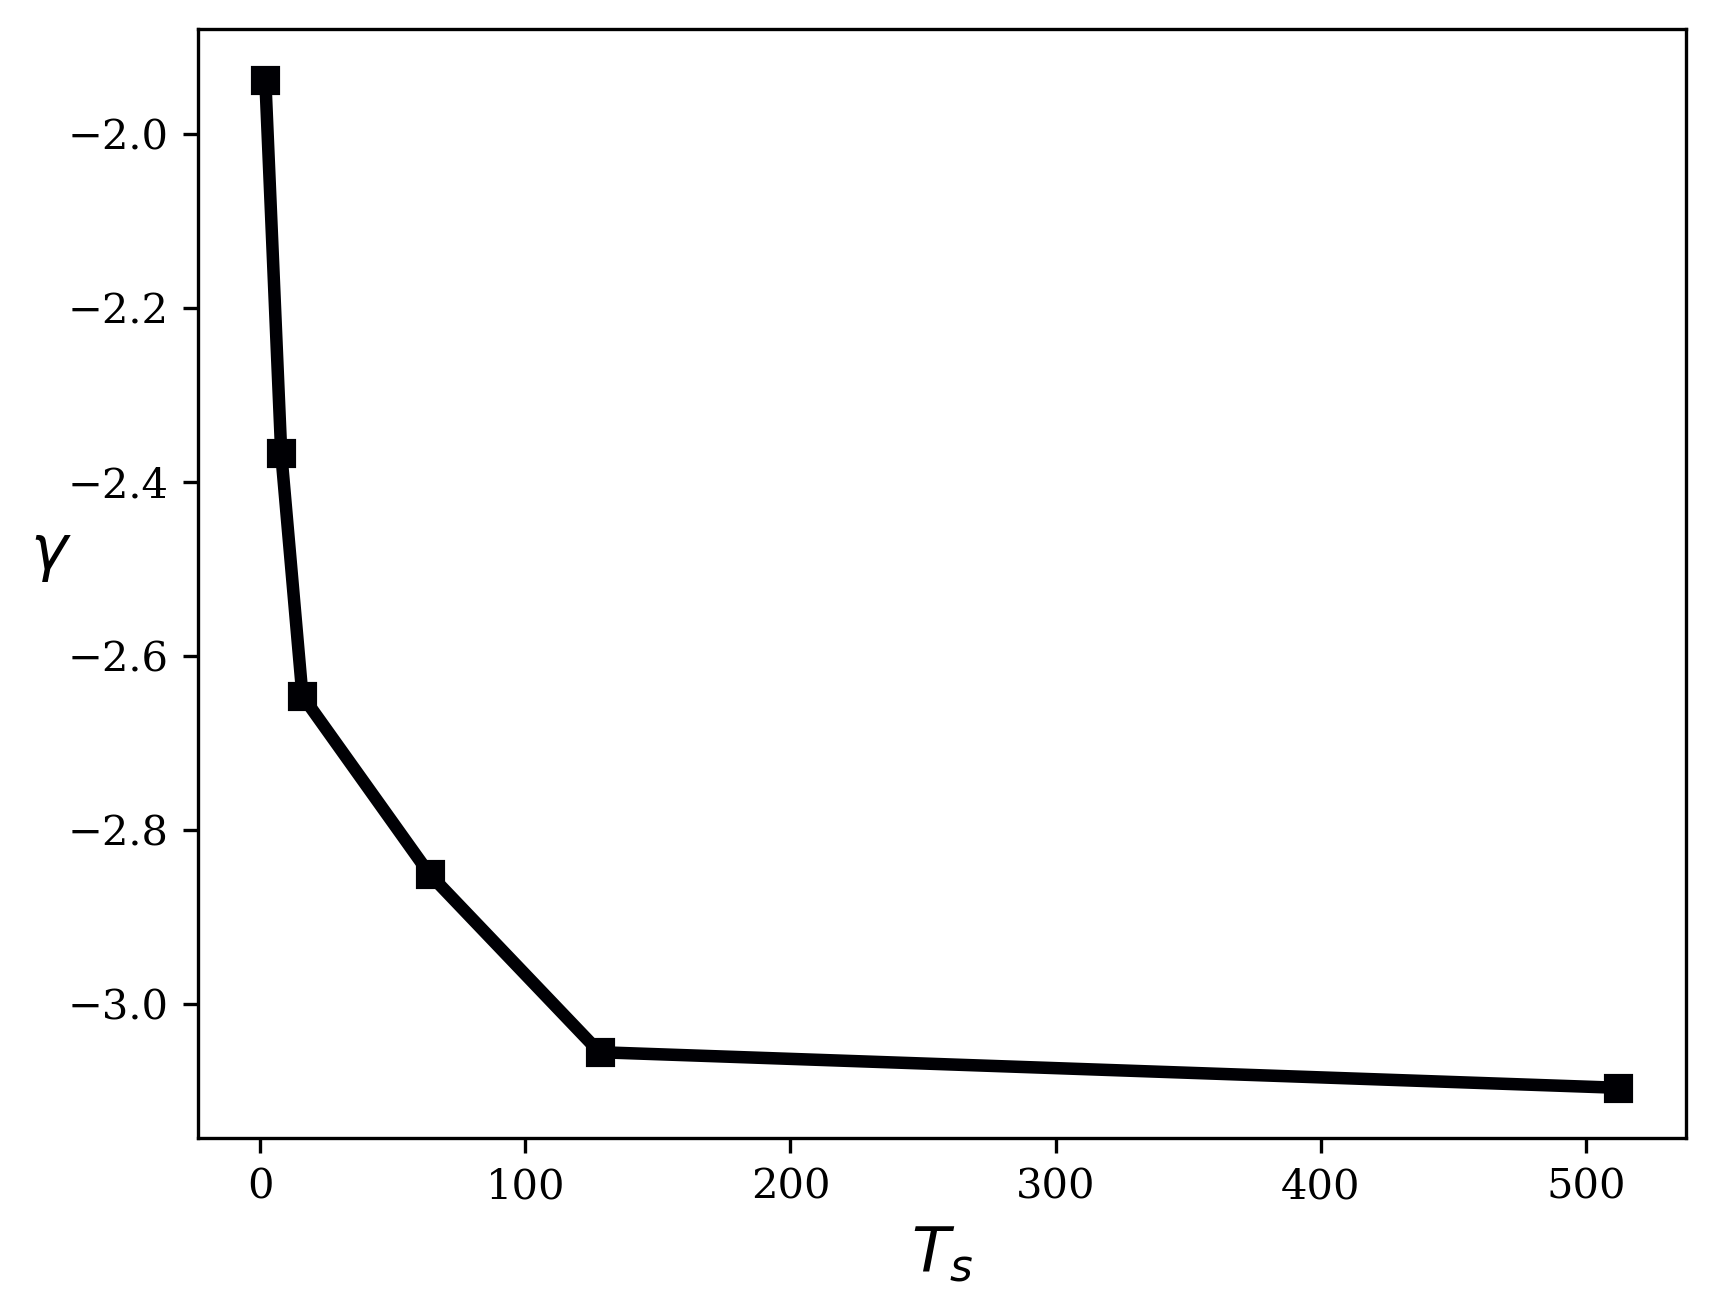

In [63]:
x = []
for i in range(0,10):
    #print(x)
    x.append(curve_data[i][0])

x = np.array(x[:6])

y = np.array(exp_crit[:6])
plt.figure(figsize=(9,9))
plt.figure(dpi=300)
cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 10)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']
plt.xlabel(r'$T_{s}$')
plt.ylabel(r"$\gamma$", rotation=0)


plt.plot(x,y,'s-')

In [43]:
x

array([  2,   8,  16,  64, 128, 512])

In [44]:
y

array([-1.93821079, -2.36765585, -2.64622174, -2.8513235 , -3.05564735,
       -3.09653213])

In [64]:
x1 = np.log(x)
y1 = y

 ## linear regression
# Reshape the data if needed
x1 = x1.reshape(-1, 1)
y1 = y1.reshape(-1, 1)
#print(x, y)
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x1, y1)

# Get the coefficients (slope and intercept)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate predicted y values
y_pred = model.predict(x1)

# Calculate regression metrics
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)

R2: 0.928461 
slope: -0.213463


<Figure size 900x900 with 0 Axes>

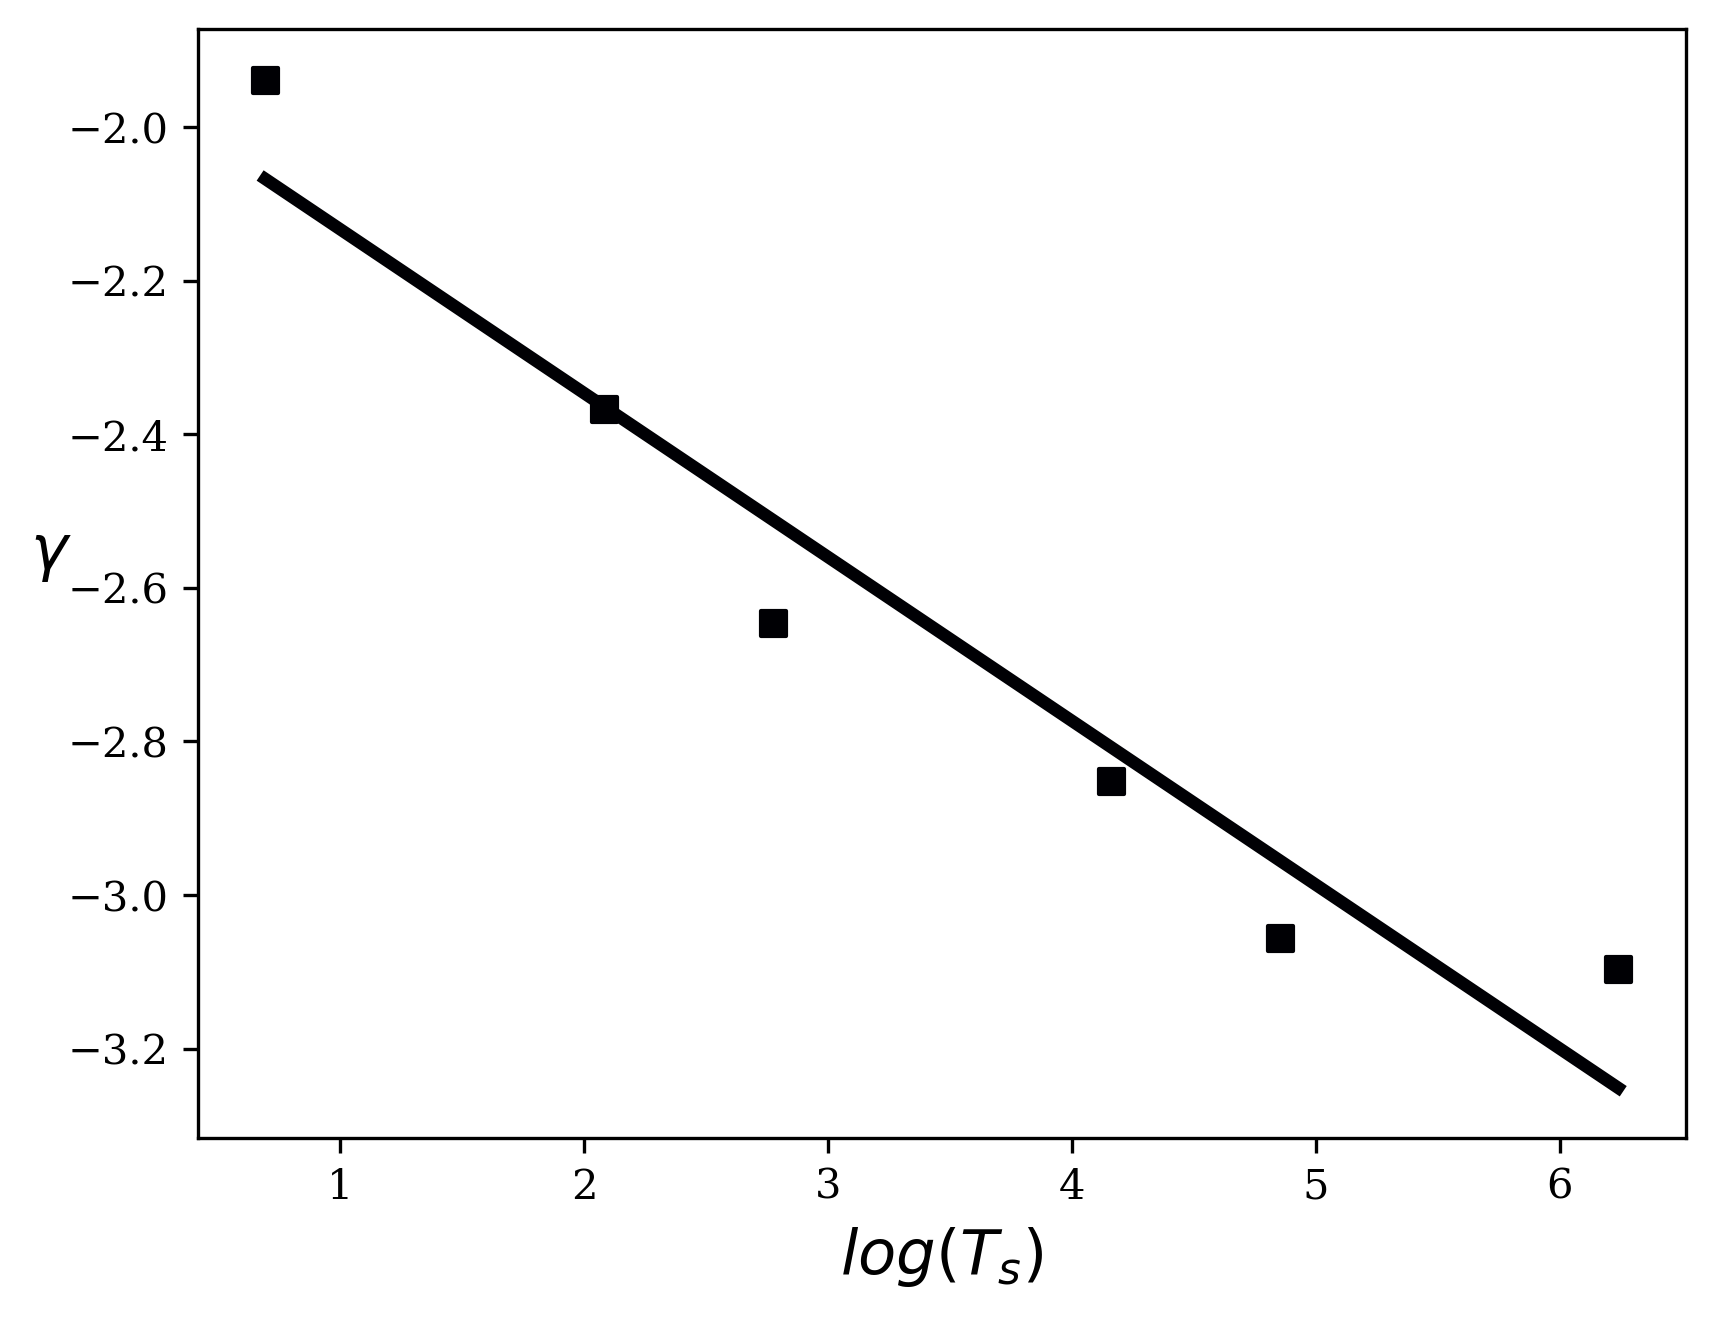

In [65]:
plt.figure(figsize=(9,9))
plt.figure(dpi = 300)
plt.viridis()
plt.scatter(x1,y1, marker = 's')
plt.plot(x1,y_pred)
# Adding labels and title
plt.xlabel(r'$log (T_{s})$')
plt.ylabel(r'$\gamma$', rotation = 0)

# Adding a background color
#plt.gca().set_facecolor('#f0f0f0')


print('R2: %f ' %r2)
print('slope: %f' %slope)

In [30]:
x = []
for i in range(0,10):
    #print(x)
    x.append(curve_data[i][0])

x = np.array(x[:6])

y = np.array(exp_crit[:6])

In [31]:
x

array([  2,   8,  16,  64, 128, 512])

In [32]:
y

array([-1.93821079, -2.36765585, -2.64622174, -2.8513235 , -3.05564735,
       -3.09653213])

(array([-3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. , -1.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

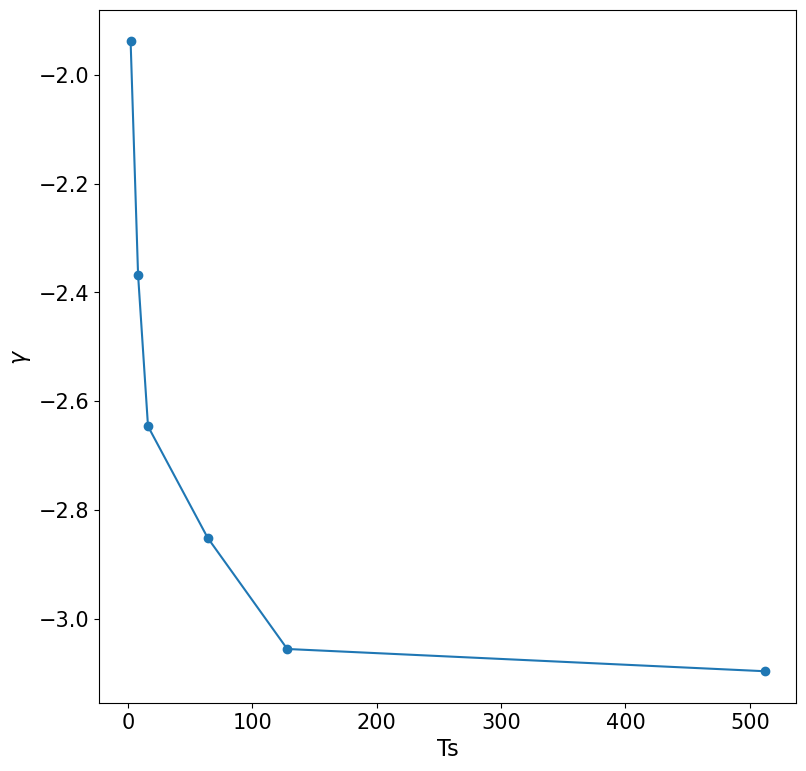

In [304]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(9,9))
plt.plot(x,y, '-o')



In [33]:
x = np.log(x)
x

array([0.69314718, 2.07944154, 2.77258872, 4.15888308, 4.85203026,
       6.23832463])

In [307]:
 ## linear regression
# Reshape the data if needed
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
#print(x, y)
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Get the coefficients (slope and intercept)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate predicted y values
y_pred = model.predict(x)

# Calculate regression metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

R2: 0.971737 
slope: -0.553780


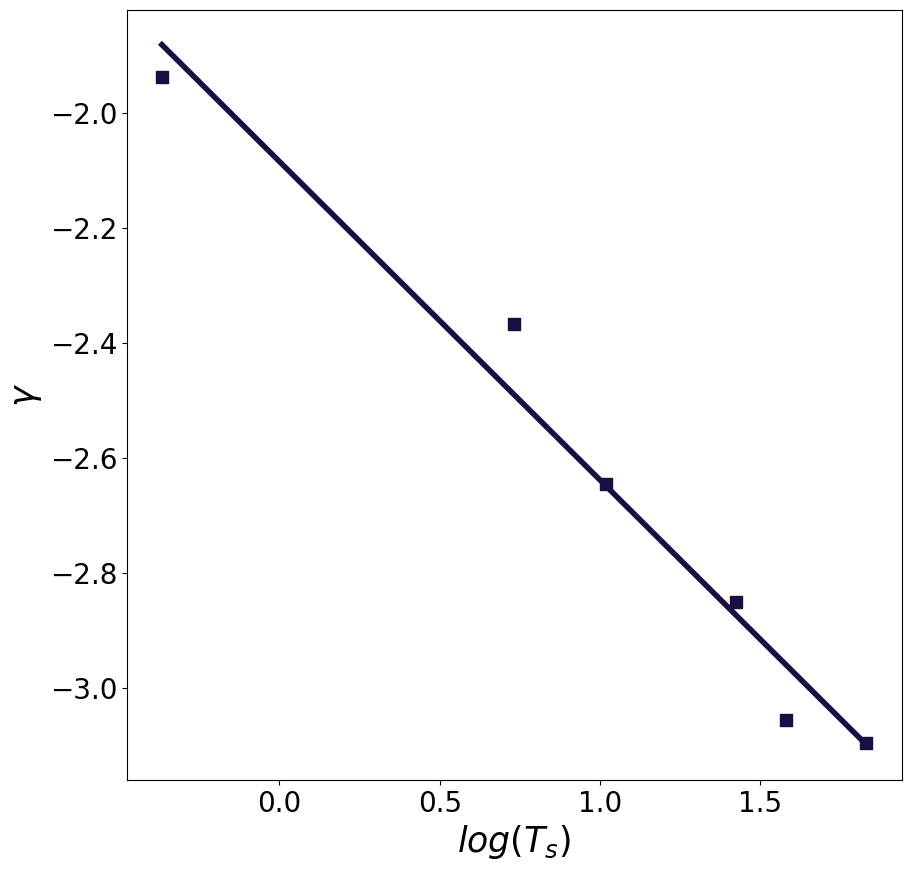

In [314]:
plt.figure(figsize=(10,10))
plt.viridis()
plt.scatter(x,y, marker = 's', s = 80, color = colors[1])
plt.plot(x,y_pred, color = colors[1], linewidth = 4)
# Adding labels and title
plt.xlabel(r'$log (T_{s})$', fontsize=25)
plt.ylabel(r'$\gamma$', fontsize=25)

# Adding a background color
#plt.gca().set_facecolor('#f0f0f0')

# Customize tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
print('R2: %f ' %r2)
print('slope: %f' %slope)

In [353]:
import matplotlib.pyplot as plt
plt.style.use('style.mplstyle')

In [1]:
plt.figure(figsize = (8,8))
cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 10)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']
plt.xlabel(r'$log(s)$')
plt.ylabel(r"$log (P_{s})$")


for i in curve_index[:6]:
    slope, intercept, mse, r2, x, y, y_pred = analyse_data_ava(curve_data, i, cut[i])
    file_name = curve_data[i][0]
    exp_crit.append(slope)
    # Plot the data points for each curve with the custom dark color
    plt.scatter(x, y, label=f'Ts {file_name}', marker= markers[i])

    # Plot the fitted regression line for each curve with the custom dark color
    plt.plot(x, y_pred)


plt.legend()
plt.savefig('avalanche_ts_6_fit.png')

NameError: name 'plt' is not defined

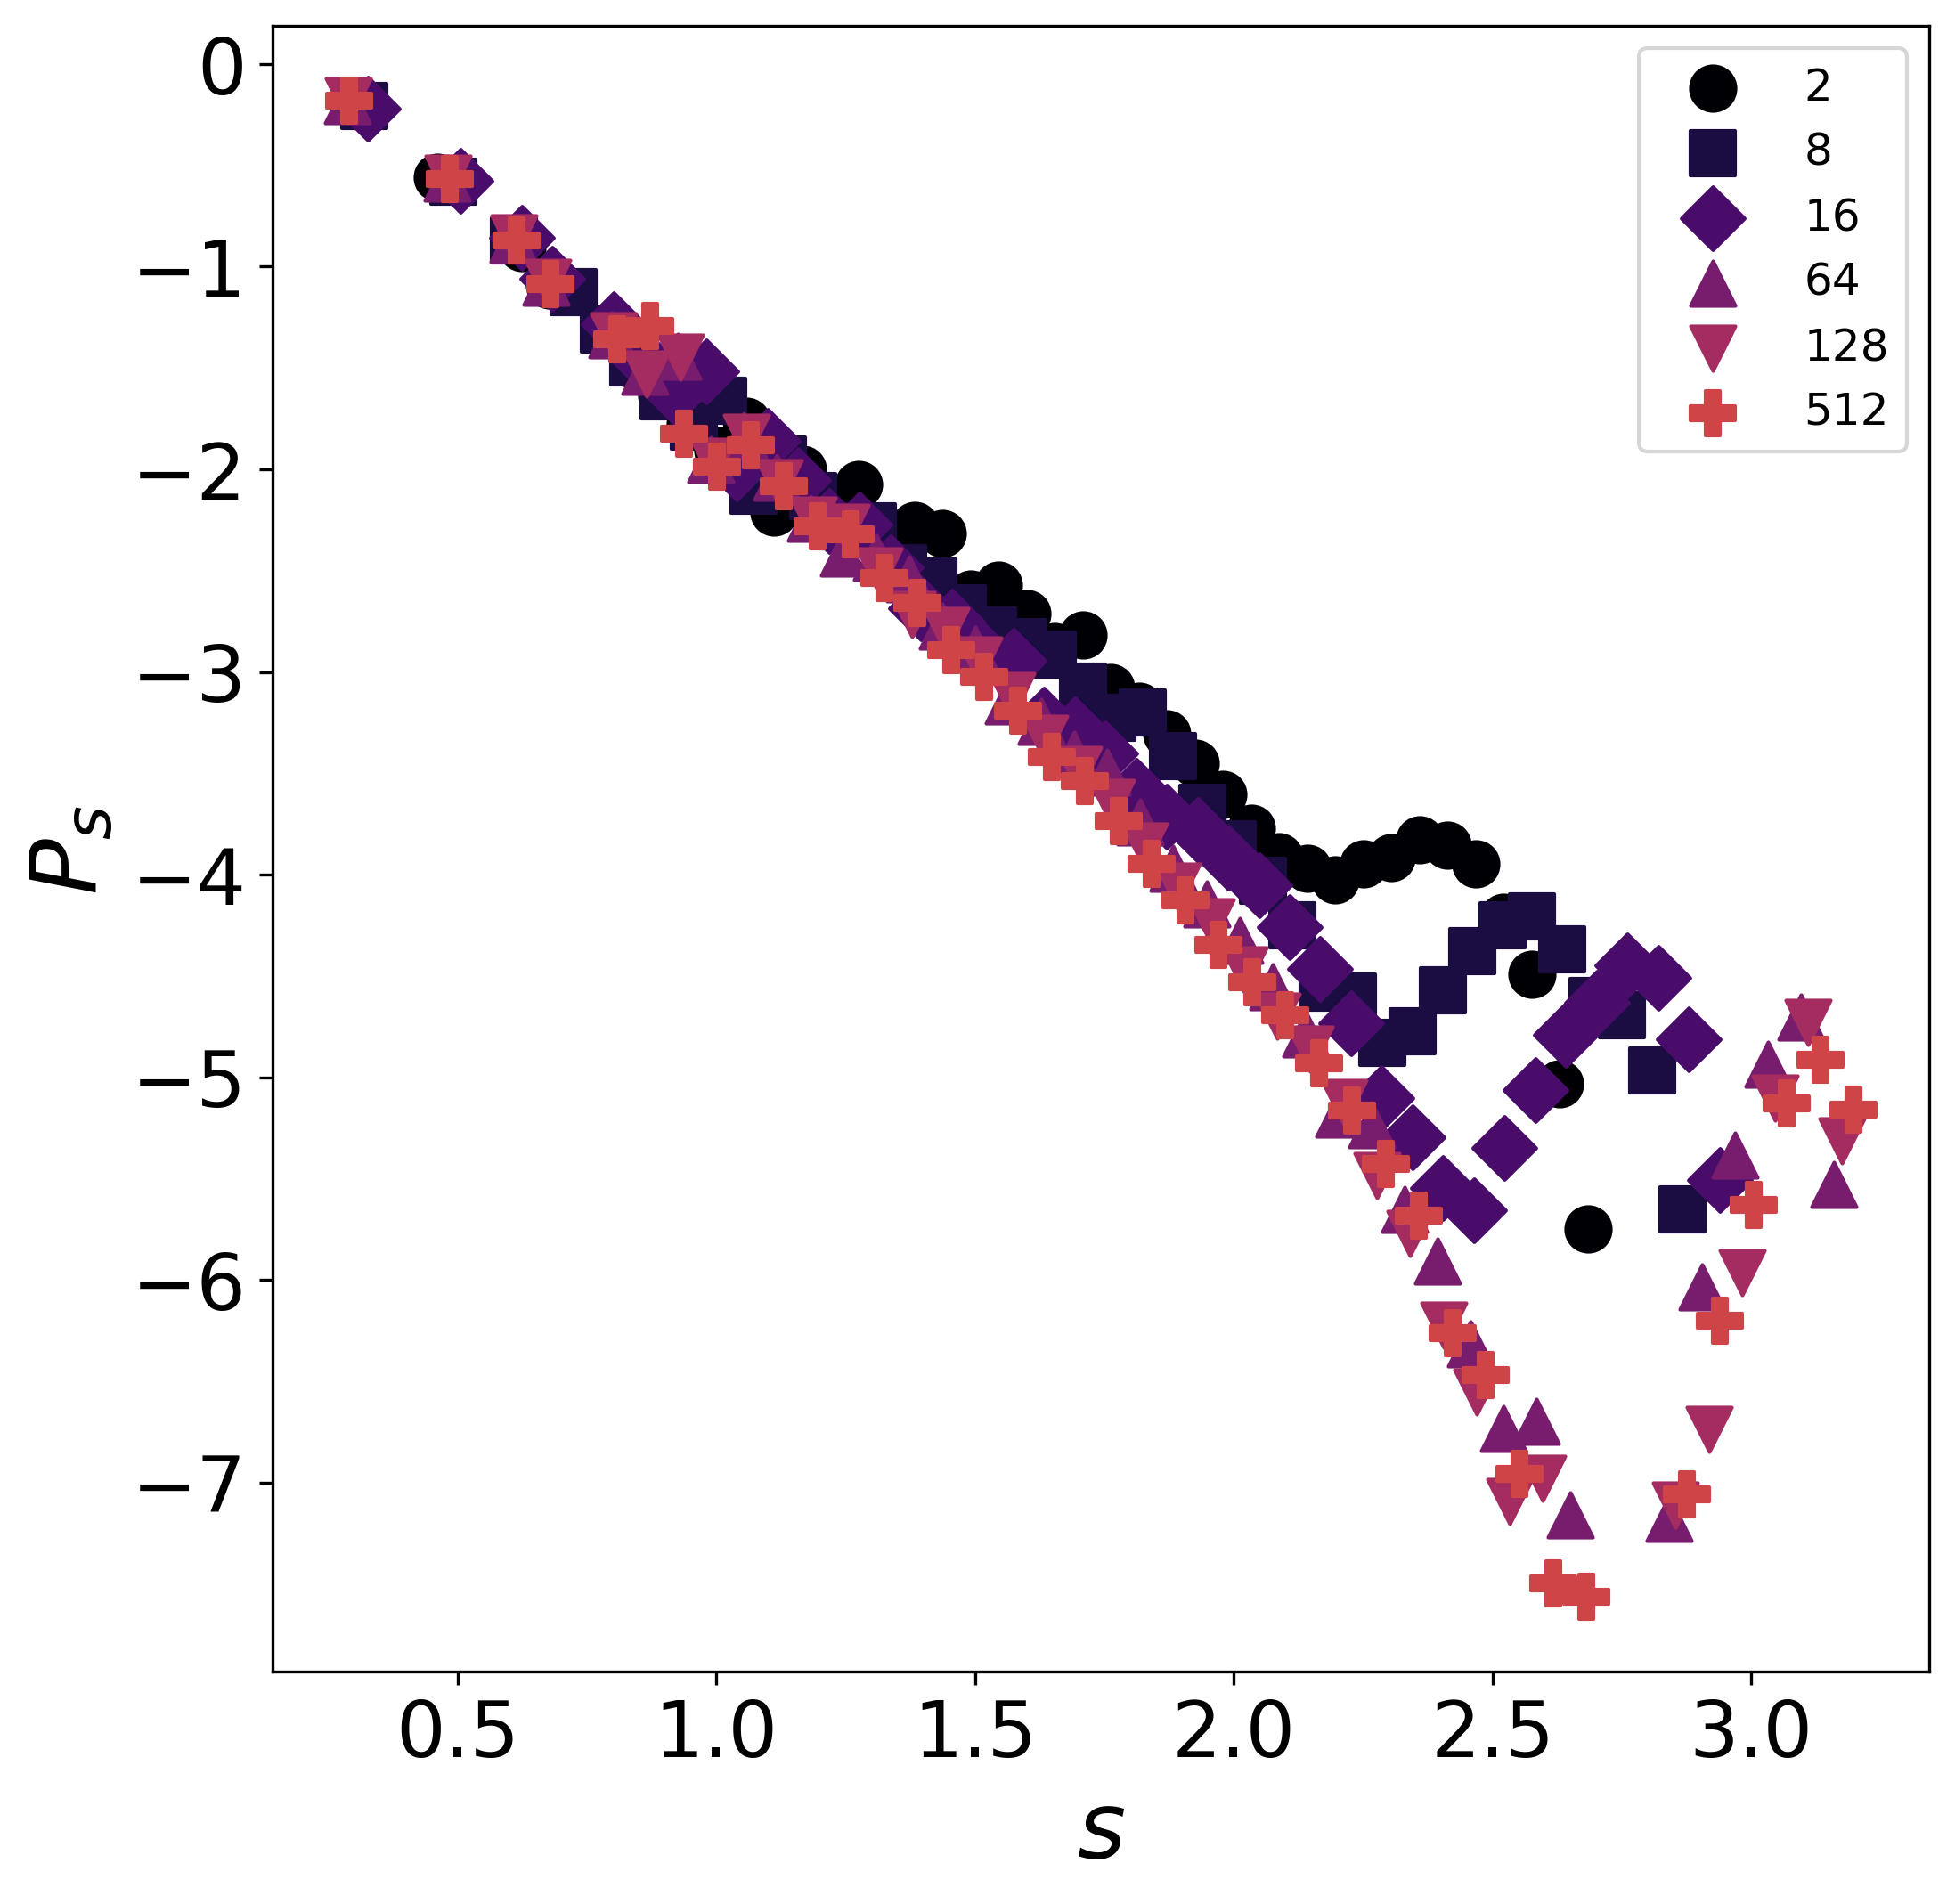

In [363]:
cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 10)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']
plt.ylabel(r'$P_{s}$')
plt.xlabel(r"$s$")
# Iterate over speci                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       fic numbers in ascending order
i = 0
for file_number in specific_numbers[:6]:
    
    if file_number in number_file_map:
        file_name = number_file_map[file_number]
        file_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(file_path)

        # Separate the columns
        x = data[:, 0]
        y = data[:, 1]

        # Save the data for the curve in a tuple and append to the list
        curve_data.append((file_number, x, y))

        # Plot the curve
        label = '%d' % file_number
        plt.scatter(x, y, label=label, marker=markers[i])
        i+=1
plt.legend()
plt.savefig('avalanche_ts_6.png')

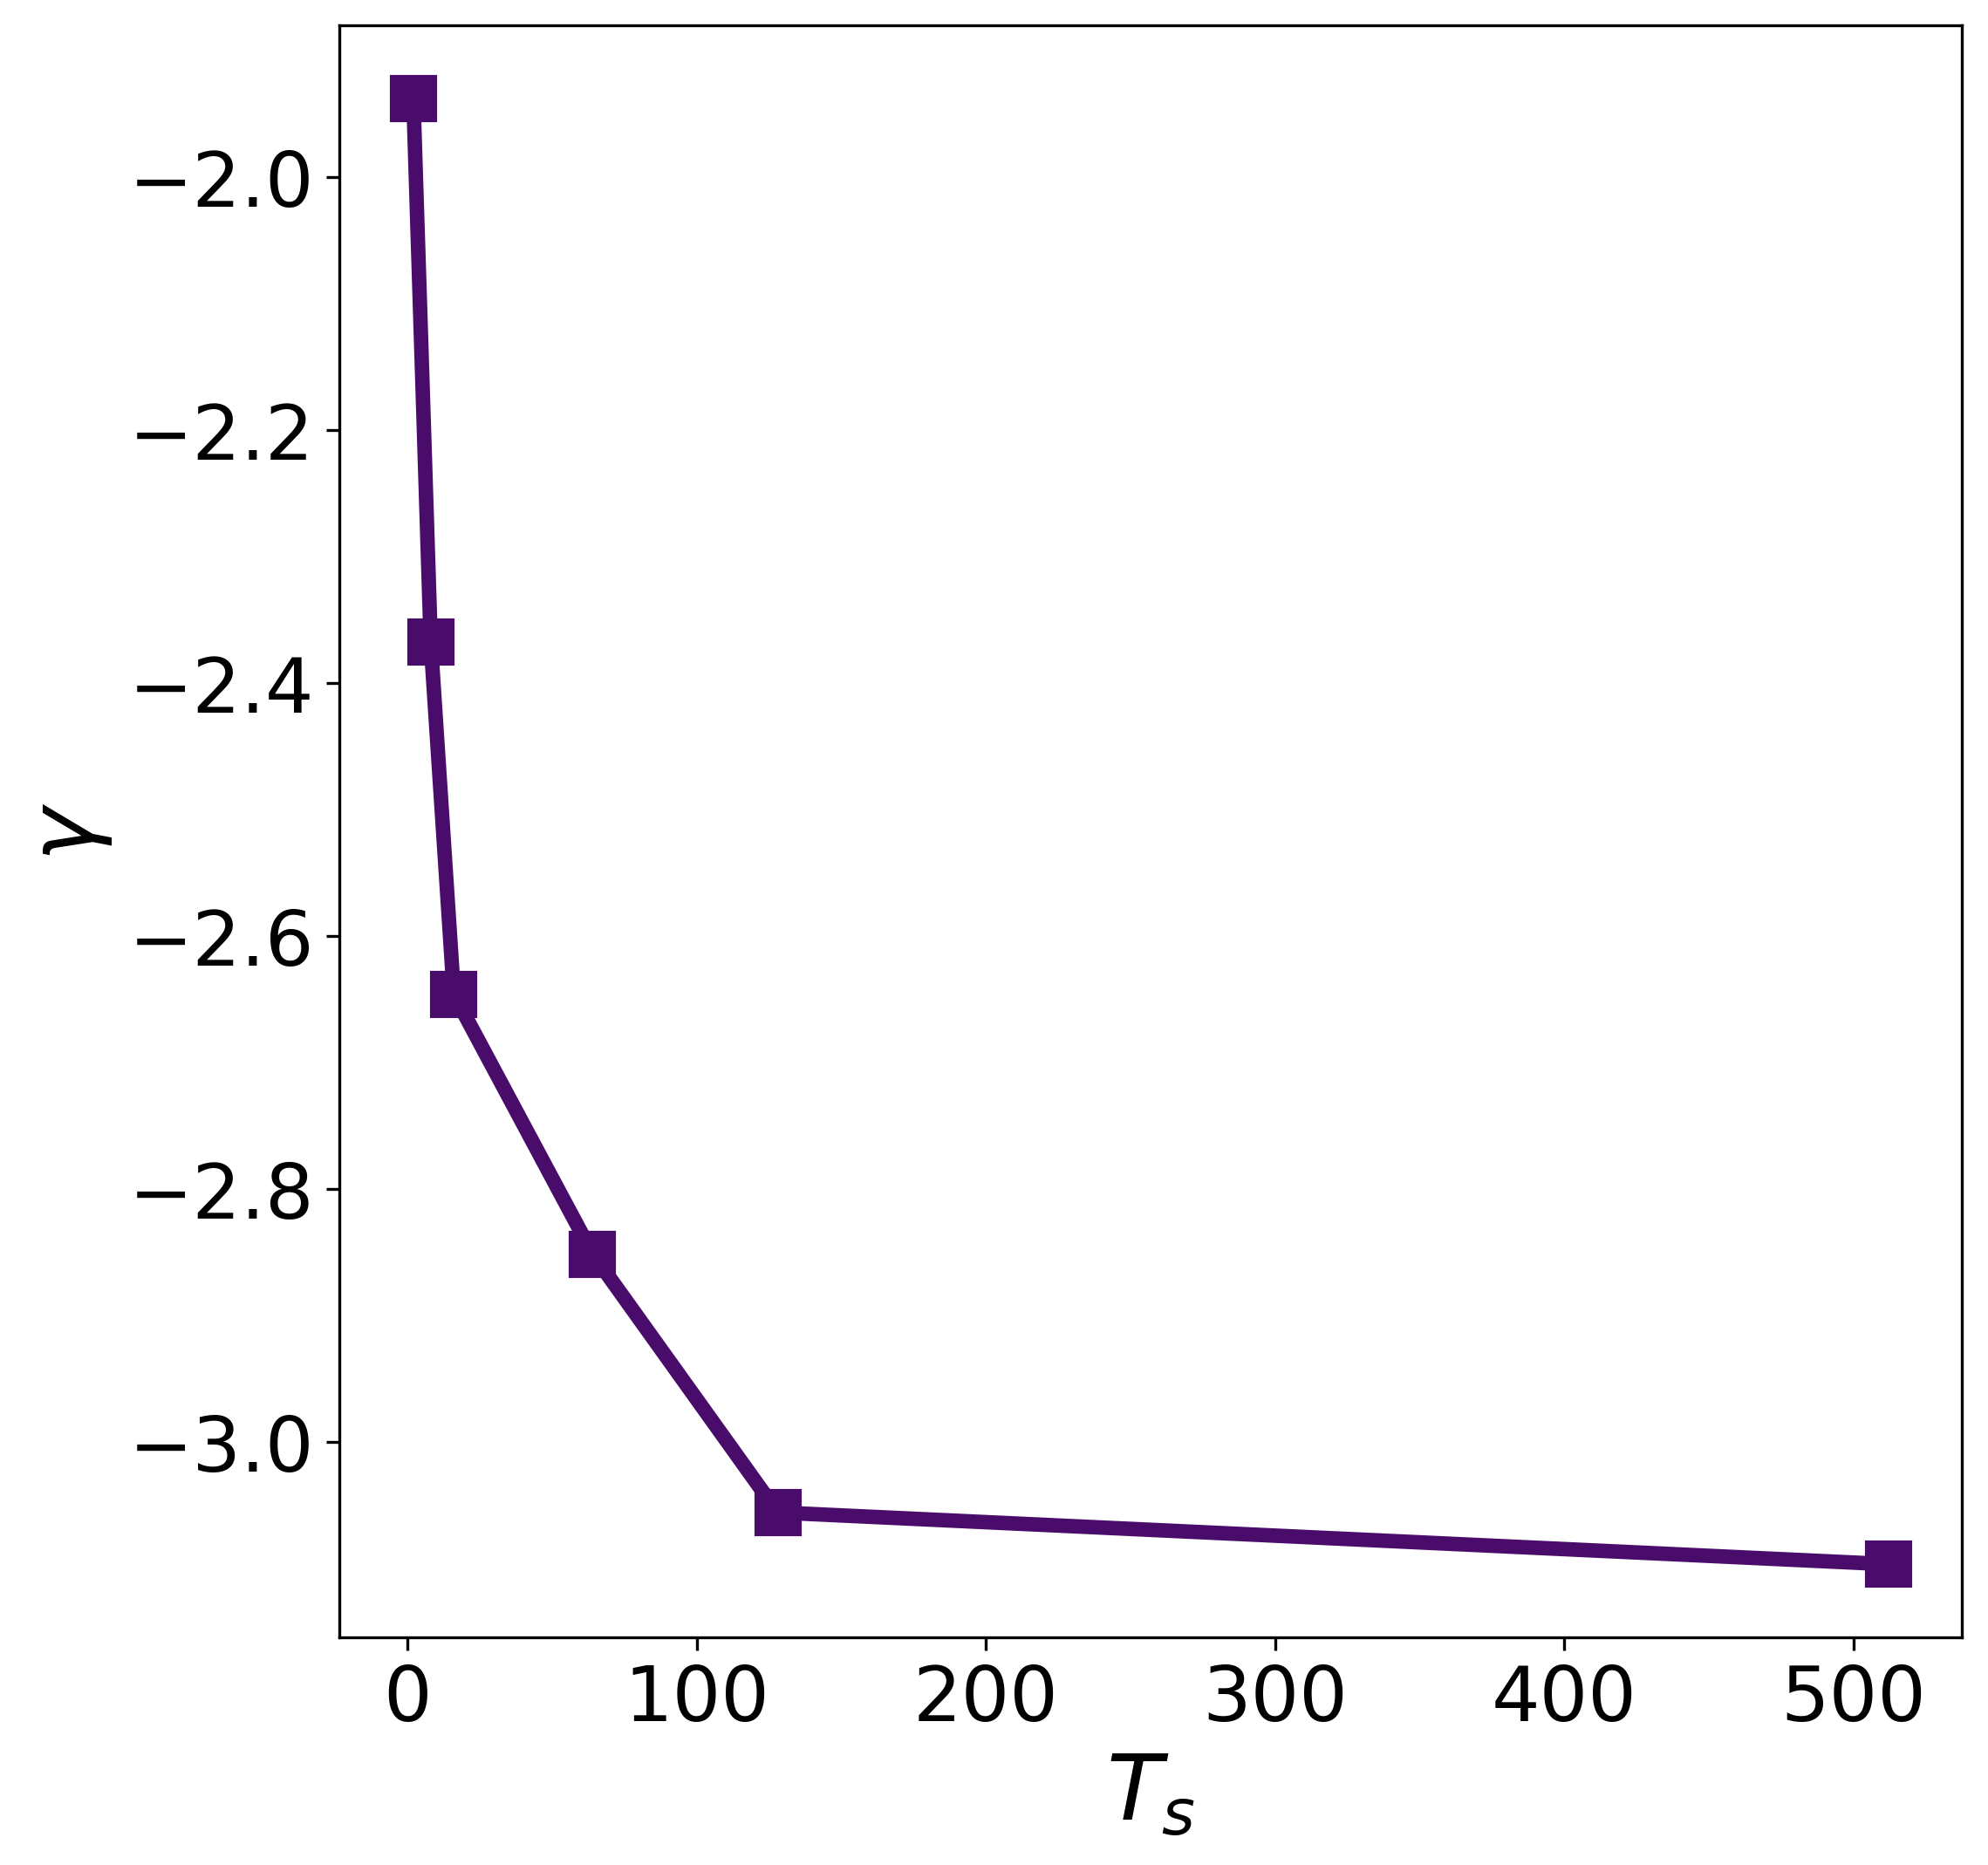

In [395]:
x = []
for i in range(0,10):
    #print(x)
    x.append(curve_data[i][0])

x = np.array(x[:6])

y = np.array(exp_crit[:6])

cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 10)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']
plt.xlabel(r'$T_{s}$')
plt.ylabel(r"$\gamma$")

plt.plot(x,y, marker = markers[1], color = colors[2])
plt.savefig('gamma_ts.png')

In [385]:
x

array([  2,   8,  16,  64, 128, 512])

In [386]:
x1 = np.log(x)

In [387]:
x1

array([0.69314718, 2.07944154, 2.77258872, 4.15888308, 4.85203026,
       6.23832463])

R2: 0.928461 
slope: -0.213463


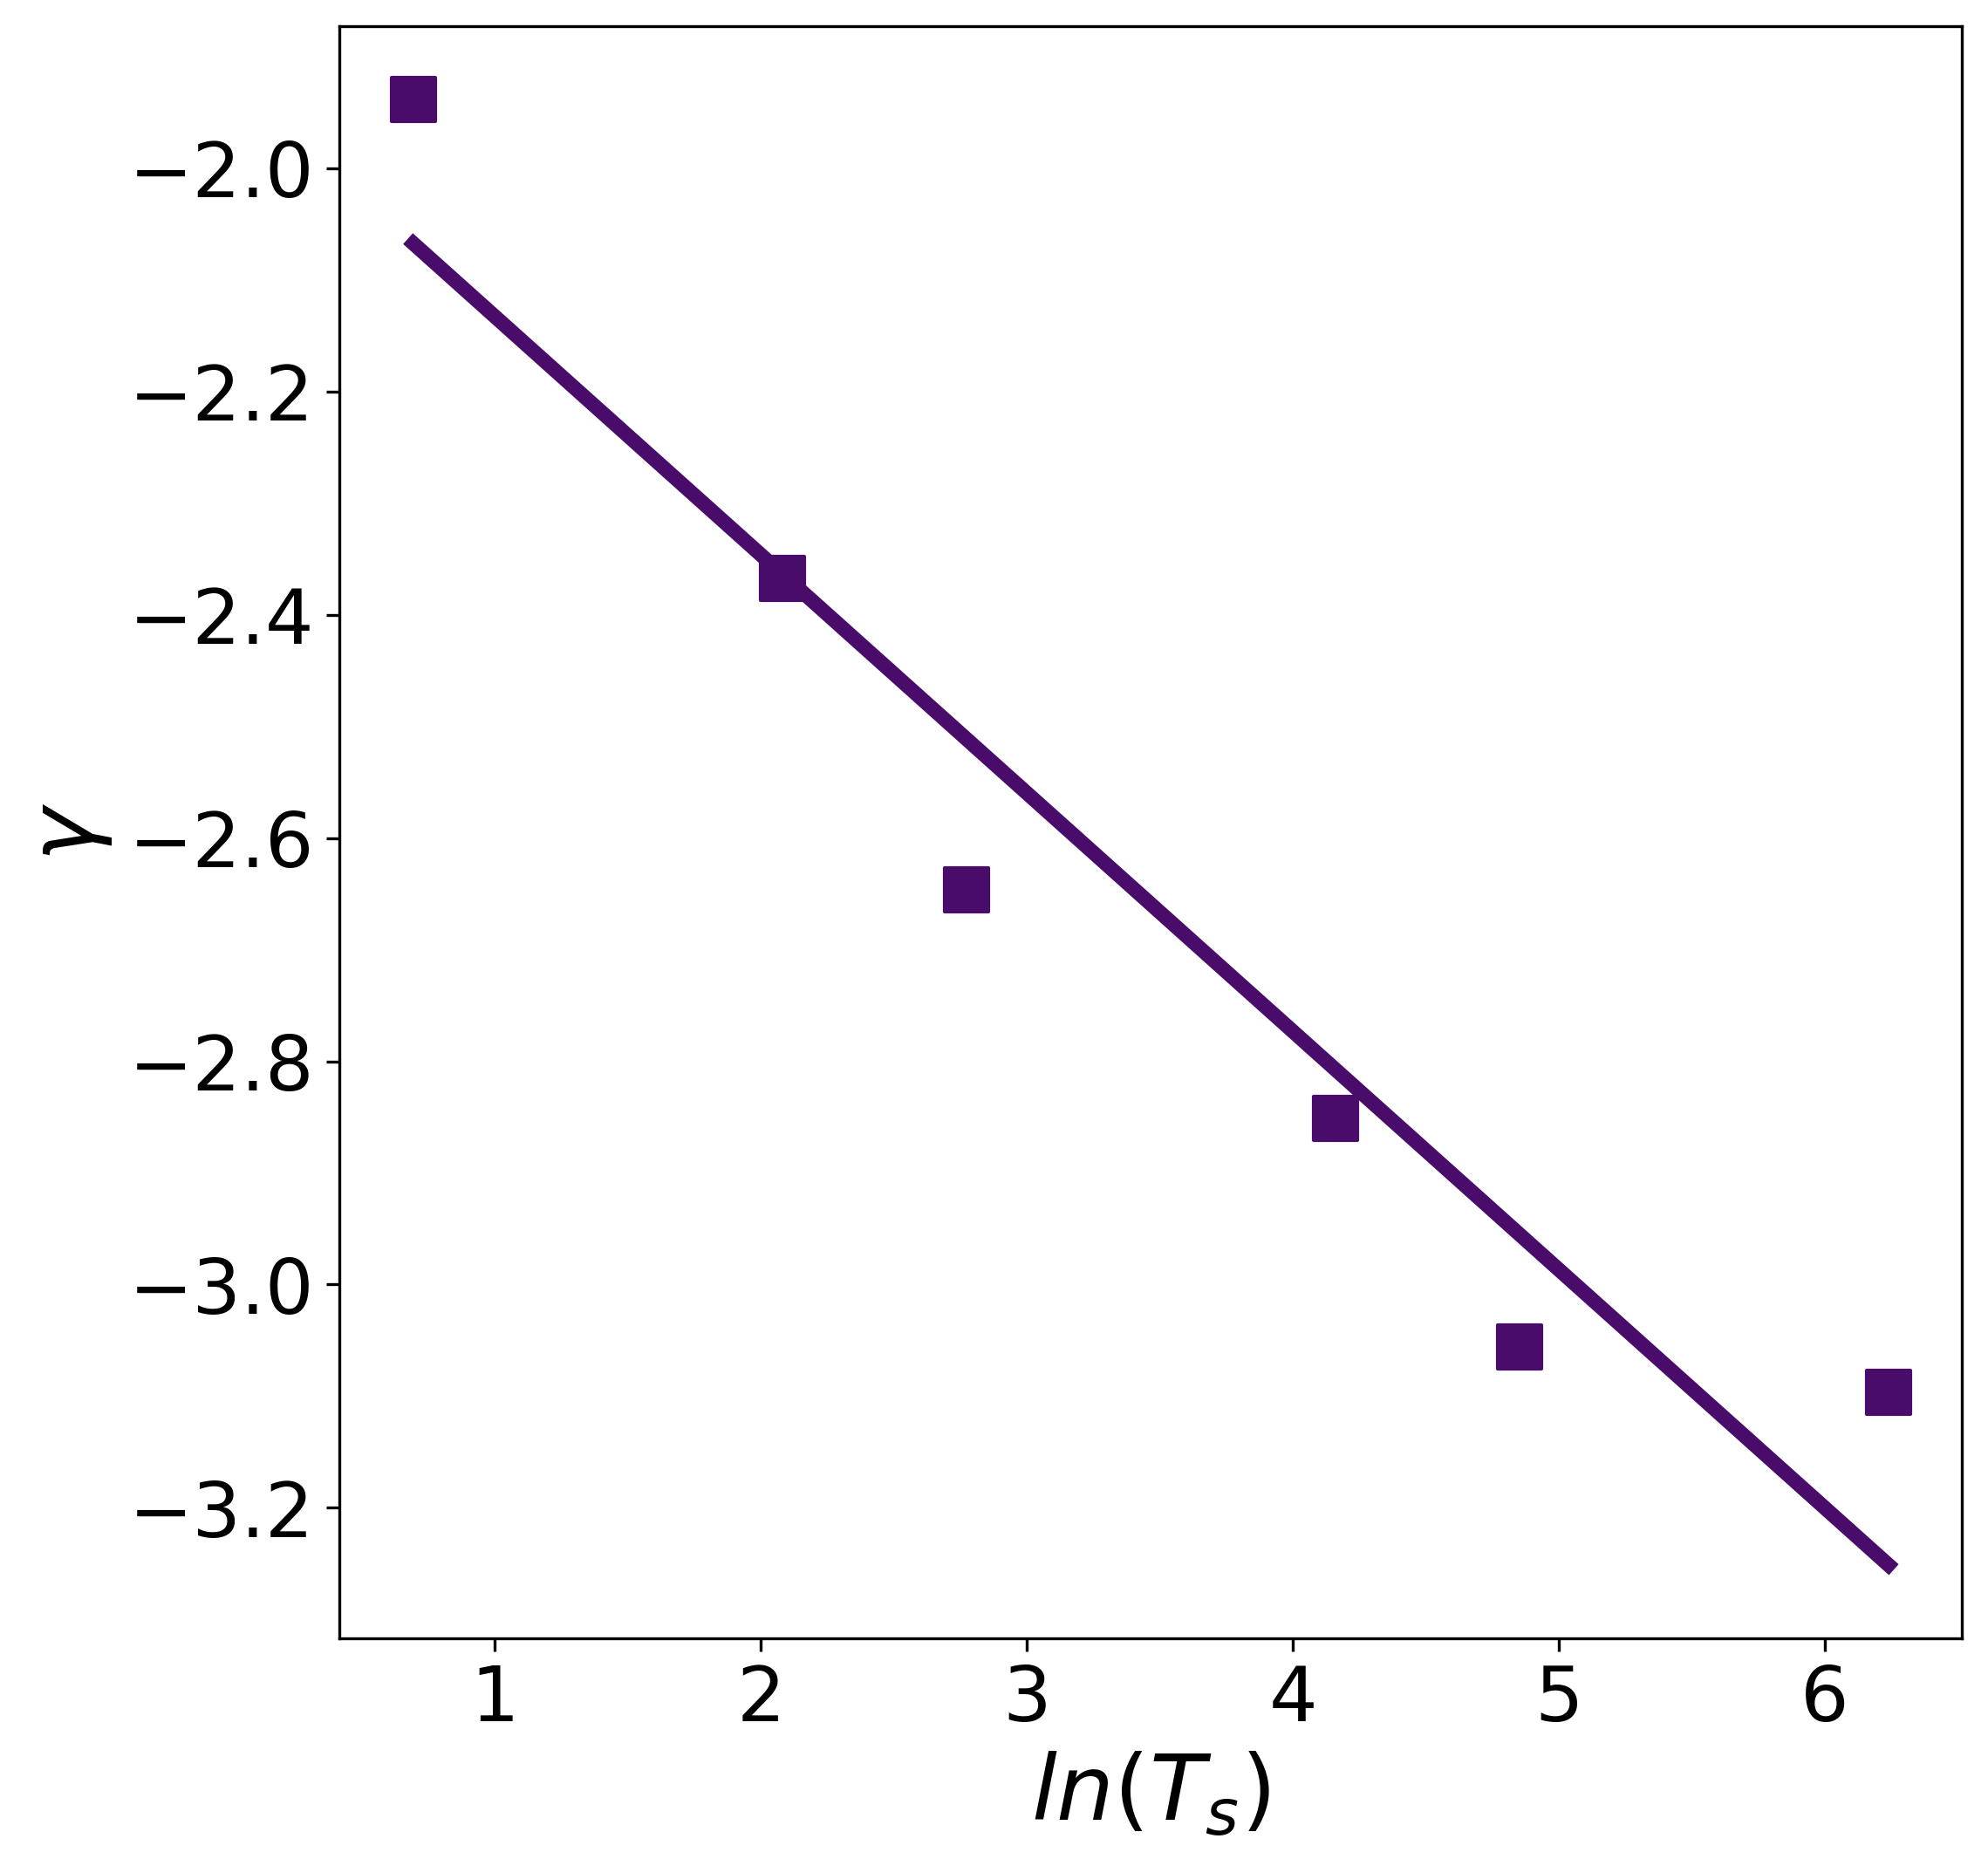

In [396]:
cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 10)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H']
plt.xlabel(r'$ln(T_{s})$')
plt.ylabel(r"$\gamma$")

## linear regression
# Reshape the data if needed
x1 = x1.reshape(-1, 1)
y = y.reshape(-1, 1)
#print(x, y)
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x1, y)

# Get the coefficients (slope and intercept)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Calculate predicted y values
y_pred = model.predict(x1)

# Calculate regression metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

plt.scatter(x1,y, marker = markers[1], color = colors[2])
plt.plot(x1,y_pred, color = colors[2])
print('R2: %f ' %r2)
print('slope: %f' %slope)

plt.savefig('reg_gamma_ts.png')

In [1]:
%pip install mpmath



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import powerlaw
import numpy as np 
data = np.linspace(0,100,100)
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
9.083271777305292%
78.7878787878788
